## Praca domowa 4

#### Autor: Kacper Skonieczka

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.

In [2]:
df.loc[(df.Publisher == "Nintendo") & (df.Year > 2015) & (df.NA_Sales < df.EU_Sales)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4199,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
6477,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
14703,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


Nazwy tych gier to:

Mario & Sonic at the Rio 2016 Olympic Games	
Teddy Together


b) Jak rodzaj gry zarobił najwięcej w roku 2010?

In [3]:
df.loc[df.Year == 2010].groupby("Genre").Global_Sales.agg("sum").sort_values(ascending = False).reset_index()

,Genre,Global_Sales
0,Action,117.64
1,Misc,96.86
2,Sports,92.53
3,Shooter,77.41
4,Role-Playing,70.52
5,Racing,34.93
6,Platform,31.90
7,Simulation,21.99
8,Adventure,16.57
9,Fighting,14.89


Odp: Action

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.

In [4]:
df2 = df.groupby("Genre")[["EU_Sales", "JP_Sales"]].agg("mean")
df2 = df2.loc[df2.JP_Sales > df2.EU_Sales].reset_index()
df2 = df2[["Genre","JP_Sales"]]
df2 = df2.rename(columns = {'Genre' : "Typ Gry",
                     'JP_Sales' : "Średnia sprzedaż w Japonii"})
df2 = df2.sort_values(by = "Średnia sprzedaż w Japonii", ascending = False).reset_index(drop = True)
df2

,Typ Gry,Średnia sprzedaż w Japonii
0,Role-Playing,0.238293
1,Puzzle,0.099439
2,Strategy,0.073284


Odp: Role-playing, Puzzle, Strategy

### Zadanie 2 (3.5 pkt)


Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

## 1) Orginalny wykres
Żródło: https://www.rp.pl/polityka/art19043381-sondaz-ibris-dla-rzeczpospolitej-poparcie-wzroslo-wszystkim-tylko-nie-konfederacji-i-psl
![Poprawiany wykres](wykres1.png)



## 2) Wykres w ggplot2
Źródło:   https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/SkonieczkaKacper/hw2.html

![Poprawiany wykres](wykres2.png)


## 3)  Kod generujący wykres poprawiający ten z punktu 2)

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter
import numpy as np

In [6]:
partie = ["PiS"," Koalicja \n Obywatelska", "Polska\n2050", "Lewica","Konfederacja","PSL","osoby \n niezdecydowane"]
procenty = [36,25,14,9,5,5,6]
df = pd.DataFrame()
df['partie'] = partie
df['procenty'] = procenty
df['kolejnosc'] = 7,6,5,4,3,2,1
df = df.sort_values("kolejnosc")

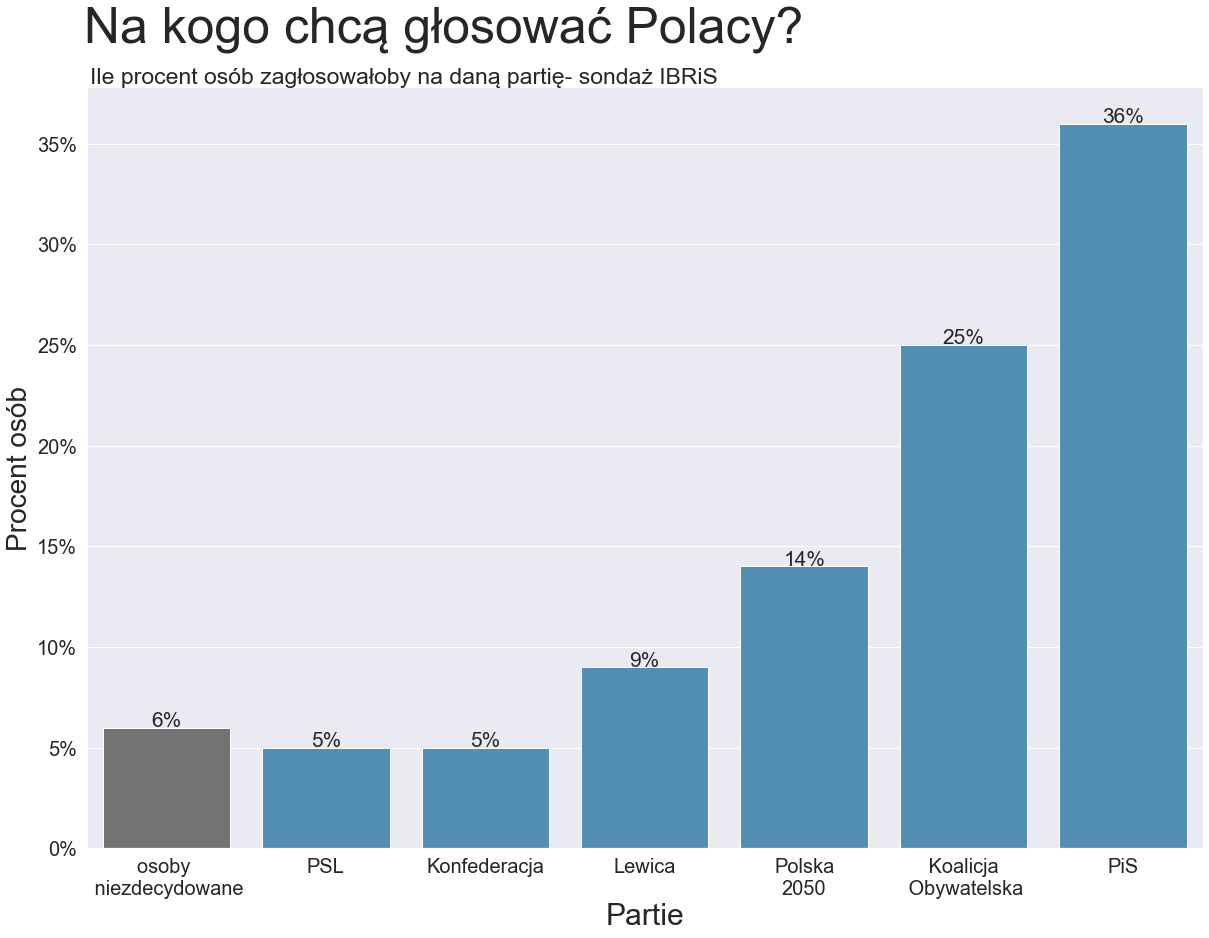

In [7]:
sns.set_theme()
sns.set(rc = {'figure.figsize': (20,14)})
plot = sns.barplot(x="partie",  y="procenty", data=df, palette = ["#737373","#4292C6","#4292C6",
                                "#4292C6","#4292C6","#4292C6","#4292C6"]) 
plot.set_xlabel("Partie",fontsize=30)
plot.set_ylabel("Procent osób",fontsize=28)
plot.tick_params(labelsize=20)
plt.title("Na kogo chcą głosować Polacy?", fontsize = 50, y = 1.05, x = 0.32)
plt.suptitle("Ile procent osób zagłosowałoby na daną partię- sondaż IBRiS", y = 0.9, x = 0.345, fontsize = 23);
plot.yaxis.set_major_formatter(PercentFormatter(100, decimals = 0))
patches = plot.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   plot.annotate('{:.0f}%'.format(df.procenty[df.kolejnosc[i]-1]), (x, y), ha='center', size=21)

## Wygenerowany wykres

![Poprawiany wykres](wykres3.png)


## 4) Uzasadnienie

Uzasadnienie czemu wykres jest lepszy od wykresu źródłowego pozostaje takie samo. Stworzony wykres słupkowy jest czytelniejszy. W tym źródłowym jedną część jakby wyciągnięto nad pozostałe. Perspektywa i efekt rzucanego cienia utrudnia porównywanie wartości, co i tak jest niełatwe na wykresie kołowym. Dodatkowo nie jesteśmy w stanie określić w jakim stopniu ta powiększona czerwona część nakrywa inne. Używając wykresu kolomnowego wyeliminowałem te problemy. Wykres jest lepszy od tego w ggplot2 głównie ze względów estetycznych. Tytuł bardziej przykuwa uwagę od podtytułu, dzięki zwiększeniu różnicy wielkości czcionek. Słupki już nie unoszą sie w powietrzu, co wygląda schludniej i moim zdanie ułatwia porównywanie długości- słupki sięgają do końca wykresu, a nie do jakiejś białej linii, którą zakrywają. W tle wykresu w pythonie nie ma też lini pionowych, które były po prostu zbędne. W związku z wynikami pracy domowej numer 3, z których wynikało, że jeśli oznaczymy zbyt mało wartości na osi y to czytelność wykresu nie będzie dużo większa od wykresu kołowego, zaznaczyłem ich więcej. Do liczb nad słupkami dodałem znak procentu, żeby od razy było wiadomo co oznaczają. 